<a href="https://colab.research.google.com/github/pikey-msc/AprendizMaquina/blob/main/2023-1/Ensambles/AdaBoost.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Adaboost
Boosting is a class of ensemble machine learning algorithms that involve combining the predictions from many weak learners.

Boosting es una clase de algoritmos de aprendizaje de máquina de ensamble que combina las predicciones de varios aprendiz débiles.

Un aprendiz débil es un modelo que es muy simple. Boosting era un concepto teórico largo antes de que algún algoritmo fuera desarroolado, y el algoritmo AdaBoost (adaptive boosting) fue la primera aproximación exitosa.

El algoritmo AdaBoost usa árboles de decisión muy cortos (un nivel) como aprendices débiles que son añadidos secuencialmente al ensamble.

Cada modelo subsecuente intenta corregir las predicciones hechas por el modelo anterior en la sucesión. Esto es alcanzado al pesar el conjunto de entrenamiento enfocándose más en los ejemplos donde los modelso anteriores tuvieron errores de predicción.

Veamos como desarrollar ejemplos de clasificación y regresión usando scikit-learn.


In [12]:
import sklearn
print(sklearn.__version__)

import matplotlib.pyplot as plt
import numpy as np

1.0.2


Se tienen dos tipos de AdaBoost de regresión y clasificación

## AdaBoost para Clasificación

Se creará una clasificación sintética binaria con 1000 ejemplos y 20 variables,se usará ``make_clasification()``

In [2]:

# test classification dataset
from sklearn.datasets import make_classification
# define dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=6)
# summarize the dataset
print(X.shape, y.shape)
print(X[1:4,],y[1:4,])

(1000, 20) (1000,)
[[-2.42264447e+00  1.49687583e+00 -8.01106833e-01  2.06453050e+00
  -8.76754500e+00 -2.51286558e+00  1.40156770e+00  4.79941043e+00
   1.39750172e+00 -5.62485856e-01 -6.03669967e-01 -3.12565915e+00
  -3.18175570e+00 -2.94187480e+00 -6.81902846e-03 -4.65861153e+00
  -6.38341467e+00  1.14726175e+00 -2.86306705e+00 -2.75750181e-01]
 [-4.01744369e+00 -2.26537329e+00  2.72577799e+00  1.00600643e+00
  -2.16411293e+00  2.47987226e+00  3.76854908e+00  4.58568054e+00
   7.56015419e-01  5.59196209e-01 -4.93262512e+00 -9.07008896e-01
  -5.64508291e-01 -1.94700078e+00  8.97175132e+00  4.31027440e+00
  -4.28351097e+00  1.34014025e+00 -7.86344977e-01 -1.17749558e+00]
 [ 1.07582588e+00 -2.02984426e+00 -2.93650126e-01 -2.19362003e-01
  -2.62251509e+00 -5.53700653e-01  1.88927640e+00  2.90514390e+00
   1.25815380e+00  6.66546737e-01 -1.07470309e+00  6.10393634e-01
  -1.12460578e+00 -2.28623522e+00  4.58723680e+00  3.80914738e+00
  -7.78648467e-01  3.64361034e-01  2.31922924e-02  3.09

Se evaluaraán los modelos utilizando una validación cruzada estratificada repetida con tres repeticiones y diez cortes, usando la función  ``repeatedStratifiedKFold()``

In [3]:

# evaluate adaboost algorithm for classification
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import AdaBoostClassifier

# define the model
model = AdaBoostClassifier()
# evaluate the model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))
print(len(n_scores),n_scores)

Accuracy: 0.806 (0.041)
30 [0.79 0.82 0.84 0.75 0.88 0.79 0.77 0.84 0.83 0.84 0.83 0.84 0.81 0.79
 0.72 0.76 0.84 0.76 0.79 0.82 0.84 0.8  0.78 0.82 0.8  0.84 0.81 0.89
 0.71 0.79]


Predicción en los nuevos datos

In [4]:
# fit the model on the whole dataset
model.fit(X, y)
# make a single prediction
row = [[-3.47224758,1.95378146,0.04875169,-0.91592588,-3.54022468,1.96405547,-7.72564954,-2.64787168,-1.81726906,-1.67104974,2.33762043,-4.30273117,0.4839841,-1.28253034,-10.6704077,-0.7641103,-3.58493721,2.07283886,0.08385173,0.91461126]]
yhat = model.predict(row)
print('Predicted Class: %d' % yhat[0])

Predicted Class: 0


## AdaBoost para Regresión

Crearemos datos sintéticos con ``make_regression`` para regresión para ilustrar el método.

In [5]:

# test regression dataset
from sklearn.datasets import make_regression
# define dataset
X, y = make_regression(n_samples=1000, n_features=20, n_informative=15, noise=0.1, random_state=6)
# summarize the dataset
print(X.shape, y.shape)


(1000, 20) (1000,)


Usaremos de nuevo validación cruzada con 3 repeticiones en 10 cortes de los datos, y se calcualará el error medio cuadrático.

In [6]:

# evaluate adaboost ensemble for regression
from numpy import mean
from numpy import std
from sklearn.datasets import make_regression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.ensemble import AdaBoostRegressor
# define dataset
X, y = make_regression(n_samples=1000, n_features=20, n_informative=15, noise=0.1, random_state=6)
# define the model
model = AdaBoostRegressor()
# evaluate the model
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
# report performance
print('MAE: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

MAE: -73.045 (4.776)


In [7]:
model.fit(X, y)
# make a single prediction
row = [[1.20871625,0.88440466,-0.9030013,-0.22687731,-0.82940077,-1.14410988,1.26554256,-0.2842871,1.43929072,0.74250241,0.34035501,0.45363034,0.1778756,-1.75252881,-1.33337384,-1.50337215,-0.45099008,0.46160133,0.58385557,-1.79936198]]
yhat = model.predict(row)
print('Prediction: %d' % yhat[0])

Prediction: -55


## AdaBoost Hiperparámetros

###Explorar el número de árboles de decisión

Uno de los hiperparámetrso para el algoritmo AdaBoost es el número de árboles de decisión usados en el ensamble.
El número de árboles se puede definir con el parámetro "n_estimators", donde el valor por defecto es 50.

Vamos a iterar de 10 a 5000 en el ejemplo siguiente.

>10 0.773 (0.039)
>50 0.806 (0.041)
>100 0.801 (0.032)
>500 0.793 (0.028)


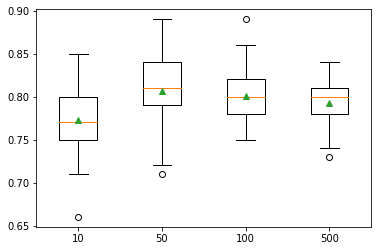

In [8]:
# explore adaboost ensemble number of trees effect on performance
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import AdaBoostClassifier
from matplotlib import pyplot
 
# get the dataset
def get_dataset():
	X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=6)
	return X, y
 
# get a list of models to evaluate
def get_models():
	models = dict()
	# define number of trees to consider
	n_trees = [10, 50, 100, 500]
	for n in n_trees:
		models[str(n)] = AdaBoostClassifier(n_estimators=n)
	return models
 
# evaluate a given model using cross-validation
def evaluate_model(model, X, y):
	# define the evaluation procedure
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	# evaluate the model and collect the results
	scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
	return scores
 
# define dataset
X, y = get_dataset()
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
	# evaluate the model
	scores = evaluate_model(model, X, y)
	# store the results
	results.append(scores)
	names.append(name)
	# summarize the performance along the way
	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

In [14]:
abc=AdaBoostClassifier()
n_trees = [10, 50, 100, 500]
n_folds=10
tuned_parameters = [{"n_estimators": n_trees}]
from sklearn.model_selection import GridSearchCV
clf=GridSearchCV(abc, tuned_parameters, cv=n_folds, refit=False)
clf.fit(X,y)

GridSearchCV(cv=10, estimator=AdaBoostClassifier(),
             param_grid=[{'n_estimators': [10, 50, 100, 500]}], refit=False)

In [15]:
scores = clf.cv_results_["mean_test_score"]
scores_std = clf.cv_results_["std_test_score"]


(10, 500)

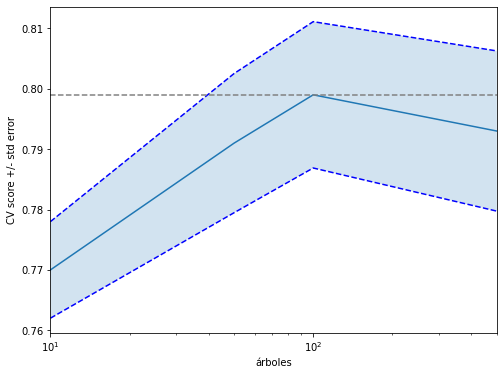

In [16]:
plt.figure().set_size_inches(8, 6)
plt.semilogx(n_trees, scores)

std_error = scores_std / np.sqrt(n_folds)

plt.semilogx(n_trees, scores + std_error, "b--")
plt.semilogx(n_trees, scores - std_error, "b--")

# alpha=0.2 controls the translucency of the fill color
plt.fill_between(n_trees, scores + std_error, scores - std_error, alpha=0.2)

plt.ylabel("CV score +/- std error")
plt.xlabel("árboles")
plt.axhline(np.max(scores), linestyle="--", color=".5")
plt.xlim([n_trees[0], n_trees[-1]])

In [25]:
from sklearn.linear_model import LassoCV
from sklearn.model_selection import KFold

k_fold = KFold(10)


print("¿Qué tanto se puede confiar en la selección del árbol?")
print()
print("¿La selección de # de árboles maximiza el score en distintos subconjuntos?")
for k, (train, test) in enumerate(k_fold.split(X, y)):
  for i in n_trees:
    model=AdaBoostClassifier(n_estimators=i)
    model.fit(X[train], y[train])
    print(
        "[fold {0}] i: [tamaño test {0}]: {2:.5f}, score: {3:.5f}".format(
            k, i, len(test), model.score(X[test], y[test])
        )
    )
print()
print("Respuesta: Los scores en el conjunto de prueba varían entre 10 puntos porcentuales por lo que hay que tomarlo con cautela")

plt.show()

¿Qué tanto se puede confiar en la selección del árbol?

¿La selección de # de árboles maximiza el score en distintos subconjuntos?
[fold 0] i: [tamaño test 0]: 100.00000, score: 0.74000
[fold 0] i: [tamaño test 0]: 100.00000, score: 0.83000
[fold 0] i: [tamaño test 0]: 100.00000, score: 0.81000
[fold 0] i: [tamaño test 0]: 100.00000, score: 0.78000
[fold 1] i: [tamaño test 1]: 100.00000, score: 0.80000
[fold 1] i: [tamaño test 1]: 100.00000, score: 0.82000
[fold 1] i: [tamaño test 1]: 100.00000, score: 0.88000
[fold 1] i: [tamaño test 1]: 100.00000, score: 0.87000
[fold 2] i: [tamaño test 2]: 100.00000, score: 0.75000
[fold 2] i: [tamaño test 2]: 100.00000, score: 0.78000
[fold 2] i: [tamaño test 2]: 100.00000, score: 0.80000
[fold 2] i: [tamaño test 2]: 100.00000, score: 0.81000
[fold 3] i: [tamaño test 3]: 100.00000, score: 0.78000
[fold 3] i: [tamaño test 3]: 100.00000, score: 0.83000
[fold 3] i: [tamaño test 3]: 100.00000, score: 0.83000
[fold 3] i: [tamaño test 3]: 100.00000, scor